# 1.Import Libraries
 Import necessary Python libraries for data analysis and visualization.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Rainfall_data.csv to Rainfall_data.csv


# 2. Load Dataset
Load the rainfall data CSV file into a Pandas dataframe.

In [4]:
import pandas as pd
df = pd.read_csv('Rainfall_data.csv')
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


# 3. Initial Data Exploration
 Display basic info, shape and sample rows to check the structure and content of the dataset.

In [5]:
print(df.info())
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               252 non-null    int64  
 1   Month              252 non-null    int64  
 2   Day                252 non-null    int64  
 3   Specific Humidity  252 non-null    float64
 4   Relative Humidity  252 non-null    float64
 5   Temperature        252 non-null    float64
 6   Precipitation      252 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 13.9 KB
None
              Year       Month    Day  Specific Humidity  Relative Humidity  \
count   252.000000  252.000000  252.0         252.000000         252.000000   
mean   2010.000000    6.500000    1.0          14.416746          67.259524   
std       6.067351    3.458922    0.0           4.382599          17.307101   
min    2000.000000    1.000000    1.0           5.740000          34.690000   
25%    2005.0

# 4. Data Cleaning
Remove duplicate entries and fill missing values with zero to clean the dataset.

In [6]:
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)  # For missing numeric data

# 5. Descriptive Statistics
Generate summary statistics for each numeric column to understand rainfall distribution and other variables.

# Monthly Rainfall Aggregation

Group the data by month and calculate the average precipitation for each month

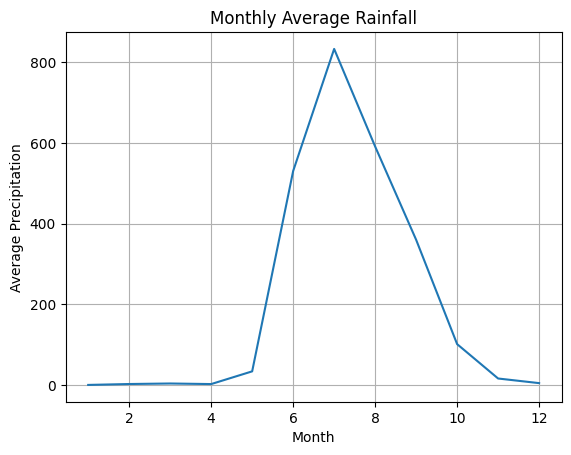

In [7]:
import matplotlib.pyplot as plt

monthly_avg = df.groupby('Month')['Precipitation'].mean()
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.title('Monthly Average Rainfall')
plt.grid(True)
plt.show()

# Date Formatting
Combine ‘Year’, ‘Month’, and ‘Day’ columns to create a ‘Date’ column using pandas datetime for easier time-based grouping.

In [9]:
from scipy.stats import zscore
df['precip_z'] = zscore(df['Precipitation'])
extremes = df[df['precip_z'] > 2]
print(extremes[['Year', 'Month', 'Day', 'Precipitation']])

     Year  Month  Day  Precipitation
55   2004      8    1         949.59
66   2005      7    1        1095.38
78   2006      7    1        1122.56
79   2006      8    1        1052.65
89   2007      6    1         902.25
114  2009      7    1        1052.50
126  2010      7    1        1068.20
127  2010      8    1         872.43
138  2011      7    1        1093.05
161  2013      6    1         932.22
162  2013      7    1         886.67
174  2014      7    1        1307.43
198  2016      7    1        1009.40
210  2017      7    1        1012.11
222  2018      7    1         969.61
234  2019      7    1        1083.30
236  2019      9    1         928.89
247  2020      8    1        1203.09


# Set Datetime Index
 Set the new ‘Date’ column as the dataframe index for time series resampling

In [11]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [12]:
df.set_index('Date', inplace=True)

# 7. Monthly Rainfall Visualization
 Plot the average monthly rainfall as a line or bar chart to visualize seasonal trends

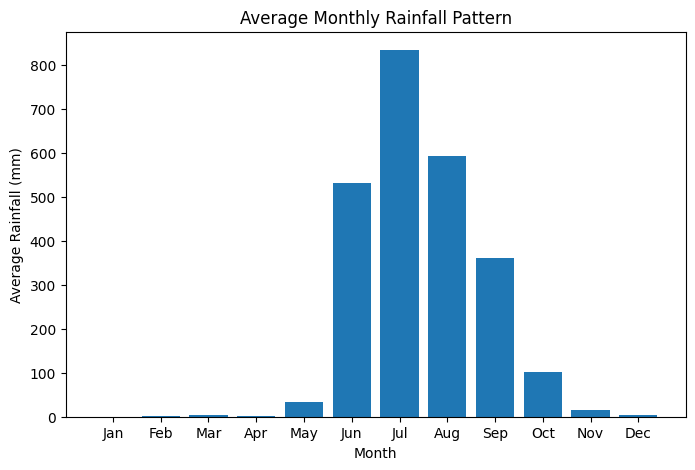

In [13]:
seasonal_monthly_avg = df.groupby(df.index.month)['Precipitation'].mean()
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(seasonal_monthly_avg.index, seasonal_monthly_avg.values)
plt.xticks(seasonal_monthly_avg.index, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel("Month")
plt.ylabel("Average Rainfall (mm)")
plt.title("Average Monthly Rainfall Pattern")
plt.show()

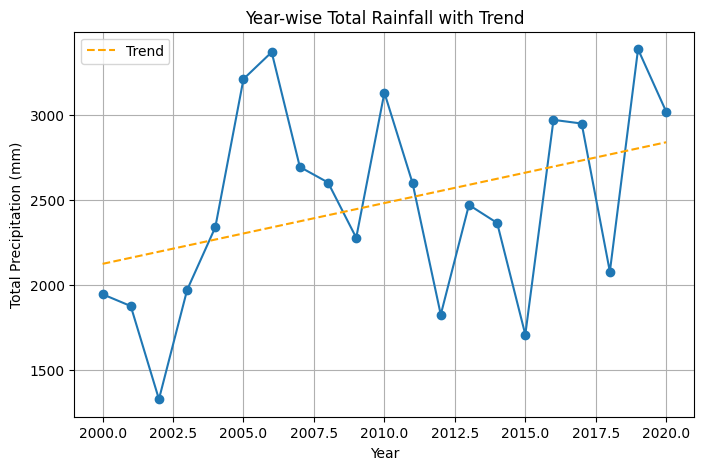

In [15]:
import numpy as np  # Add this to your imports

# Use 'YE' for yearly-end resampling to avoid the warning
yearly_total = df.resample('YE').Precipitation.sum()

plt.figure(figsize=(8,5))
plt.plot(yearly_total.index.year, yearly_total.values, marker='o')

# Trend line calculation
z = np.polyfit(yearly_total.index.year, yearly_total.values, 1)
p = np.poly1d(z)
plt.plot(yearly_total.index.year, p(yearly_total.index.year), linestyle='--', color='orange', label='Trend')

plt.xlabel("Year")
plt.ylabel("Total Precipitation (mm)")
plt.title("Year-wise Total Rainfall with Trend")
plt.legend()
plt.grid(True)
plt.show()

# Calculate Aggregates
 Calculate monthly, seasonal, and yearly total precipitation using pandas resampling and grouping.

In [17]:
# Calculate monthly total precipitation
monthly_precip = df.resample('M').Precipitation.sum()

# Calculate average monthly (seasonal) precipitation
seasonal_monthly_avg = df.groupby(df.index.month)['Precipitation'].mean()

# Calculate yearly total precipitation
yearly_total = df.resample('YE').Precipitation.sum()

/tmp/ipython-input-2930048585.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precip = df.resample('M').Precipitation.sum()


# Export Results
 Export aggregate tables (monthly, seasonal, yearly) to CSV files for reporting.

In [18]:
monthly_precip.to_csv('monthly_total_rainfall.csv')
seasonal_monthly_avg.to_csv('seasonal_monthly_avg.csv')
yearly_total.to_csv('yearly_total_rainfall.csv')